In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

In [2]:
df = pd.read_csv('export.csv', sep=';', names = ["v1", "v2", "time"])

In [3]:
df.head(10)

,v1,v2,time
0,61,30,3.50
1,20,40,2.30
2,30,40,2.05


In [4]:
for index, row in df.iterrows():
    if(row["v1"]<10 and row["v2"]<10): #Both have 1 digit
        df.loc[index, "complexity"] = 0
    elif(row["v1"]==0 or row["v2"]==0): #One of the values is 0
        df.loc[index, "complexity"] = 1
    elif(row["v1"]%10==0 and row["v2"]%10==0): #Both can be divided by 10
        df.loc[index, "complexity"] = 2
    elif(row["v1"]<10 or row["v2"]<10): #One of the values has 1 digit
        df.loc[index, "complexity"] = 3
    elif((row["v1"] + row["v2"])%10==0): #Sum divided by 10 is 0
        df.loc[index, "complexity"] = 4
    elif(row["v1"]%2==0 and row["v2"]%2==0): #Both are even
        df.loc[index, "complexity"] = 5
    elif(row["v1"]%2==0 and row["v2"]%2==1): #One of them is even
        df.loc[index, "complexity"] = 6
    elif(row["v1"]%2==1 and row["v2"]%2==0): #One of them is even
        df.loc[index, "complexity"] = 6
    elif(row["v1"]%2==1 and row["v2"]%2==1): #Both are odd
        df.loc[index, "complexity"] = 7

In [5]:
df['complexity'] = df['complexity'].astype(int)

In [6]:
df.head(20)

,v1,v2,time,complexity
0,61,30,3.50,6
1,20,40,2.30,2
2,30,40,2.05,2


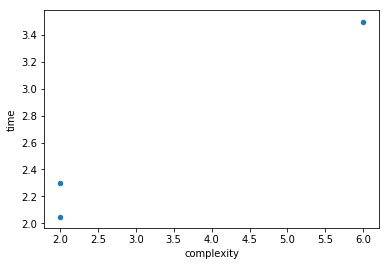

In [7]:
df.plot(x="complexity", y="time", kind="scatter")

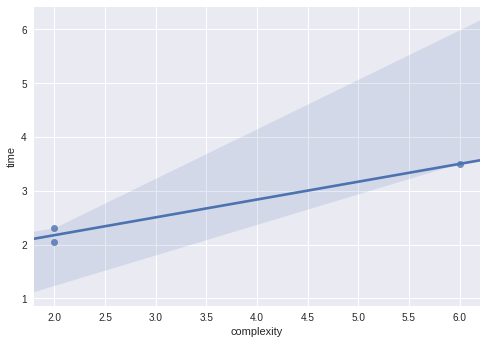

In [8]:
#Paint regression line
import seaborn as sns
sns.set(color_codes=True)
sns.regplot(x="complexity", y="time", data=df)

In [9]:
X = df["complexity"]
y = df["time"]
#Create test data
X_test = X[0:len(df)/2].values.reshape(-1,1)
y_test = y[0:len(df)/2]
#Create train data
X_train = X[len(df)/2:].values.reshape(-1,1)
y_train = y[len(df)/2:]

In [10]:
ols = linear_model.LinearRegression()

In [11]:
model = ols.fit(X_train, y_train)

In [12]:
model.coef_

array([ 0.])

In [13]:
model.score(X_test, y_test)

0.0

In [14]:
list(model.predict(X_test))

[2.1749999999999998]

In [15]:
import cPickle
#Save classifier
with open("classifier.pkl", "wb") as fid:
    cPickle.dump(model, fid)

In [16]:
with open("classifier.pkl", "rb") as fid:
    regr_loaded = cPickle.load(fid)